In [2]:
! pip install --quiet  "urllib3" "seaborn"

In [1]:
import sys  
sys.path.insert(0, r"C:\\Users\jorge\\Documents\\Projects Jorge C\\DRUIDA PROJECT\\POC\\druida_V01\\src\\")

import os

from __future__ import print_function
#from Utilities.SaveAnimation import Video




from druida import Stack
from druida import setup

from druida.DataManager import datamanager
from druidaHFSS.modules import tools
from druida.tools import utils


#import lightning as L
import matplotlib
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data
import torchvision

from torchvision import transforms

import glob
from tqdm.notebook import tqdm
import random
import numpy as np
import pandas as pd

import argparse


plt.set_cmap("cividis")
%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg", "pdf")  # For export
matplotlib.rcParams["lines.linewidth"] = 2.0
sns.reset_orig()

%load_ext tensorboard

# Path to the folder where the datasets are/should be downloaded (e.g. CIFAR10)
DATASET_PATH = os.environ.get("PATH_DATASETS", "data/")
# Path to the folder where the pretrained models are saved
CHECKPOINT_PATH = os.environ.get("PATH_CHECKPOINT", "saved_models/VisionTransformers/")

# Setting the seed
#L.seed_everything(42)

# Ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print("Device:", device)

Device: cpu


<Figure size 640x480 with 0 Axes>

In [2]:
boxImagesPath="C:\\Users\\jorge\\Dropbox\\Public\\MetasufacesData\\Images Jorge Cardenas\\"
DataPath="C:\\Users\\jorge\\Dropbox\\Public\\MetasufacesData\\Exports\\output\\"
simulationData="C:\\Users\\jorge\\Dropbox\\Public\\MetasufacesData\\DBfiles\\"

In [3]:
parser = argparse.ArgumentParser()

parser.add_argument("run_name",type=str)
parser.add_argument("epochs",type=int)
parser.add_argument("batch_size",type=int)
parser.add_argument("workers",type=int)
parser.add_argument("gpu_number",type=int)
parser.add_argument("device",type=str)
parser.add_argument("learning_rate",type=float)
parser.add_argument("condition_len",type=float) #This defines the length of our conditioning vector
parser.add_argument("metricType",type=float) #This defines the length of our conditioning vector
parser.add_argument("patch_size",type=int)

parser.run_name = "Predictor Training"
parser.epochs = 10
parser.batch_size = 10
parser.workers=0
parser.gpu_number=0
parser.image_size = 128
parser.dataset_path = os.path.normpath('/content/drive/MyDrive/Training_Data/Training_lite/')
parser.device = "cpu"
parser.learning_rate = 1e-4
parser.condition_len = 10
parser.metricType='AbsorbanceTM' #this is to be modified when training for different metrics.
parser.patch_size=16

metricType=['AbsorbanceTM','AbsorbanceTE' ]

categories=["box", "circle", "cross"]

model_kwargs={
        "batch_size":parser.batch_size,
        "embed_dim":  3 * (parser.patch_size)**2 ,
        "hidden_dim":  2*(3 * (parser.patch_size)**2),
        "num_heads": 16,
        "num_layers": 8,
        "patch_size": parser.patch_size,
        "num_channels": 3,
        "num_patches": (parser.image_size//parser.patch_size)**2,
        "num_classes": 601,
        "dropout": 0.1,
        "image_size":parser.image_size,
        "conditionalIn":True,
        "conditionalLen":10
    }





In [4]:
dataloader = utils.get_data_with_labels(parser.image_size, parser.image_size,0.9, boxImagesPath,parser.batch_size, drop_last=True)


In [5]:
len(iter(dataloader))

737

## 1. Preprocessing

In [6]:
imagesPath="C:\\Users\\jorge\\Dropbox\\Public\\MetasufacesData\\Images\\"

In [7]:

folders=glob.glob(imagesPath+"/*/", recursive = True)
files=[]

print(folders)
for folder in folders:
    
    if folder != imagesPath+"\\"+ "processed128\\":
        files=(files+glob.glob(folder+"/*"))



['C:\\Users\\jorge\\Dropbox\\Public\\MetasufacesData\\Images\\09a2f2c2-ad7f-11ee-bb2a-047c16a08772\\', 'C:\\Users\\jorge\\Dropbox\\Public\\MetasufacesData\\Images\\0ed3a0e8-a653-11ee-9db6-047c16a08772\\', 'C:\\Users\\jorge\\Dropbox\\Public\\MetasufacesData\\Images\\3be7fd33-bd16-11ee-be43-047c16a08772\\', 'C:\\Users\\jorge\\Dropbox\\Public\\MetasufacesData\\Images\\55628454-b316-11ee-82a4-047c16a08772\\', 'C:\\Users\\jorge\\Dropbox\\Public\\MetasufacesData\\Images\\56dee422-b317-11ee-bb58-047c16a08772\\', 'C:\\Users\\jorge\\Dropbox\\Public\\MetasufacesData\\Images\\7262ded2-a81d-11ee-8e0e-047c16a08772\\', 'C:\\Users\\jorge\\Dropbox\\Public\\MetasufacesData\\Images\\89962313-bbc8-11ee-a7fe-047c16a08772\\', 'C:\\Users\\jorge\\Dropbox\\Public\\MetasufacesData\\Images\\a03ae6f6-bc71-11ee-aef0-047c16a08772\\', 'C:\\Users\\jorge\\Dropbox\\Public\\MetasufacesData\\Images\\b34769e8-bcbb-11ee-bce8-047c16a08772\\', 'C:\\Users\\jorge\\Dropbox\\Public\\MetasufacesData\\Images\\b6b02fee-a8bb-11ee-8

In [6]:

for file in files:
    fileName_absolute = os.path.basename(file) 
    path=os.path.dirname(file)

    #ROI is 
    image_rgb=tools.cropImage( file,image_path=path,
                              image_name=fileName_absolute,
                              output_path=imagesPath, 
                             resize_dim=(128,128))
        


The new directory is created!


## Architecture

In [8]:

vision_transformer = Stack.VisionTransformer(**model_kwargs )


conditioned


# Training


In [9]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import torch.optim as optimizer

from IPython.display import HTML

import glob
from tqdm.notebook import tqdm


In [10]:
def join_simulationData():
    df = pd.DataFrame()

    for file in glob.glob(simulationData+"*.csv"): 
        df2 = pd.read_csv(file)
        df = pd.concat([df, df2], ignore_index=True)
    
    df.to_csv('out.csv',index=False)
    
join_simulationData()   

In [11]:
import json

Substrates={"Rogers RT/duroid 5880 (tm)":0}
Materials={"copper":0,"pec":1}
Surfacetypes={"Reflective":0,"Transmissive":1}
TargetGeometries={"circ":0,"box":1, "cross":2}
           
def set_conditioning(target,path,categories):
    df = pd.read_csv("out.csv")
    arr=[]

    for idx,name in enumerate(path):
        series=name.split('_')[-1].split('.')[0]
        batch=name.split('_')[4]
        iteration=series.split('-')[-1]
        row=df[(df['sim_id']==batch) & (df['iteration']==int(iteration))  ]

        
        target_val=target[idx]
        category=categories[idx]
        geometry=TargetGeometries[category]
        
        """"
        surface type: reflective, transmissive
        layers: conductor and conductor material / Substrate information
        """
        surfacetype=row["type"].values[0]
        surfacetype=Surfacetypes[surfacetype]
        
        layers=row["layers"].values[0]
        layers= layers.replace("'", '"')
        layer=json.loads(layers)
        
        materialconductor=Materials[layer['conductor']['material']]
        materialsustrato=Substrates[layer['substrate']['material']]
        
        
        if (target_val==2): #is cross. Because an added variable to the desing 
            
            sustratoHeight= json.loads(row["paramValues"].values[0])
            sustratoHeight= sustratoHeight[-2]
        else:
        
            sustratoHeight= json.loads(row["paramValues"].values[0])
            sustratoHeight= sustratoHeight[-1]
        
        arr.append([geometry,surfacetype,materialconductor,materialsustrato,sustratoHeight,1,1,1,1,1])
    
    return arr

#
#conditions=set_conditioning(targets, path, categories)
#conditions

In [14]:
images, targets,path,categories= next(iter(dataloader))
conditions=set_conditioning(targets, path, categories)
conditioningArray=torch.FloatTensor(conditions)
# compute vision transformer output
vit_output = vision_transformer(images,condition=conditioningArray)

assert vit_output.size(dim=1) == 601
print(vit_output.shape)

# get class probabilities
probabilities = F.softmax(vit_output[0], dim=0)
# probabilities should sum up to 1
print(torch.sum(probabilities))

torch.Size([10, 601])
tensor(1., grad_fn=<SumBackward0>)


In [15]:
#### #File reading conf
a = []
idx=0
iters=0


"""using weigth decay regularization"""
opt = optimizer.Adam(vision_transformer.parameters(), lr=parser.learning_rate, betas=(0.5, 0.999),weight_decay=1e-3)
criterion = nn.CrossEntropyLoss()
vision_transformer.train()

loss_values, valid_loss_list = [], []
acc=[]

In [16]:
 
if parser.device!='cpu':
    vision_transformer.to('cuda')

# prepare model fr training
vision_transformer.train()


for epoch in range(parser.epochs):
    x=0
    running_loss = 0.0
    i=0
    acc_val=[]

    print('Epoch {}/{}'.format(epoch, parser.epochs - 1))
    print('-' * 10)
    
    #dataloader = utils.get_data_with_labels(512, 512,0.9, boxImagesPath,parser.batch_size,drop_last=True)


    for data in tqdm(dataloader):
        
        if parser.device!='cpu':
            images, classes, names, classes_types = data.to('cuda')
        else:
            images, classes, names, classes_types = data

            
        a = []
        idx=0
        
        """lookup for data corresponding to every image in training batch"""
        for name in names:
            series=name.split('_')[-1].split('.')[0]
            batch=name.split('_')[4]
            for name in glob.glob(DataPath+batch+'\\files\\'+'/'+parser.metricType+'*'+series+'.csv'): 
                
                #loading the absorption data
                train = pd.read_csv(name)
                values=np.array(train.values.T)
                a.append(values[1])
                #print(name)
                #print(values[1].shape)
        
        a=np.array(a)     
        #print(a.shape)
        conditioningArray=torch.FloatTensor(set_conditioning(classes, names, classes_types))

        if conditioningArray.shape[1]==parser.condition_len:
            
            
            opt.zero_grad()

            #for conditioning in case required
            outmap_min, _ = torch.min(conditioningArray, dim=1, keepdim=True)
            outmap_max, _ = torch.max(conditioningArray, dim=1, keepdim=True)
            conditioningTensor = (conditioningArray - outmap_min) / (outmap_max - outmap_min)

            
            # feedforward data

            y_predicted = vision_transformer(images,condition=conditioningArray)

            y_truth = torch.tensor(a)

            errD_real = criterion(y_predicted.float(), y_truth.float())

            acc_val= (y_predicted.argmax(dim=-1) == y_truth.argmax(dim=-1)).float().mean()
            
            errD_real.backward()
            loss=errD_real.item()
            opt.step()
            scale = torch.tensor([10.0])

            running_loss +=loss


            x += 1
            i = i+1


            if i % 10 == 5:    # print every 2000 mini-batches
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {loss / 10:.3f} running loss:  {running_loss / 10:.3f}')
                print(f'accuracy: {acc_val.mean() :.3f} ')
            iters += 1
        else:
        
            break
    loss_values.append(running_loss)
    
    acc.append(acc_val.mean())

   

Epoch 0/9
----------


  0%|          | 0/737 [00:00<?, ?it/s]

[1,     6] loss: 5.163 running loss:  32.470
accuracy: 0.000 
[1,    16] loss: 7.535 running loss:  99.910
accuracy: 0.000 
[1,    26] loss: 6.033 running loss:  159.855
accuracy: 0.200 
[1,    36] loss: 7.481 running loss:  229.121
accuracy: 0.000 
[1,    46] loss: 6.570 running loss:  292.418
accuracy: 0.100 
[1,    56] loss: 5.022 running loss:  357.831
accuracy: 0.000 
[1,    66] loss: 5.693 running loss:  417.293
accuracy: 0.100 
[1,    76] loss: 5.610 running loss:  482.823
accuracy: 0.000 
[1,    86] loss: 8.500 running loss:  549.358
accuracy: 0.100 
[1,    96] loss: 7.300 running loss:  614.134
accuracy: 0.100 
[1,   106] loss: 7.376 running loss:  680.728
accuracy: 0.200 
[1,   116] loss: 5.211 running loss:  735.464
accuracy: 0.100 
[1,   126] loss: 6.805 running loss:  800.317
accuracy: 0.100 
[1,   136] loss: 8.529 running loss:  863.361
accuracy: 0.000 
[1,   146] loss: 6.931 running loss:  925.712
accuracy: 0.000 
[1,   156] loss: 6.940 running loss:  992.750
accuracy: 0

  0%|          | 0/737 [00:00<?, ?it/s]

[2,     6] loss: 6.419 running loss:  29.522
accuracy: 0.100 
[2,    16] loss: 6.225 running loss:  95.362
accuracy: 0.000 
[2,    26] loss: 4.244 running loss:  155.775
accuracy: 0.100 
[2,    36] loss: 4.547 running loss:  217.568
accuracy: 0.100 
[2,    46] loss: 5.965 running loss:  283.041
accuracy: 0.100 
[2,    56] loss: 7.546 running loss:  344.954
accuracy: 0.100 
[2,    66] loss: 7.130 running loss:  407.140
accuracy: 0.000 
[2,    76] loss: 6.509 running loss:  469.991
accuracy: 0.000 
[2,    86] loss: 7.305 running loss:  532.273
accuracy: 0.300 
[2,    96] loss: 4.905 running loss:  589.883
accuracy: 0.000 
[2,   106] loss: 4.957 running loss:  648.871
accuracy: 0.000 
[2,   116] loss: 6.975 running loss:  714.341
accuracy: 0.000 
[2,   126] loss: 7.966 running loss:  781.924
accuracy: 0.000 
[2,   136] loss: 6.271 running loss:  848.460
accuracy: 0.000 
[2,   146] loss: 5.879 running loss:  913.900
accuracy: 0.000 
[2,   156] loss: 5.986 running loss:  974.092
accuracy: 0

  0%|          | 0/737 [00:00<?, ?it/s]

[3,     6] loss: 5.409 running loss:  27.704
accuracy: 0.100 
[3,    16] loss: 6.218 running loss:  89.715
accuracy: 0.000 
[3,    26] loss: 7.054 running loss:  149.602
accuracy: 0.000 
[3,    36] loss: 6.139 running loss:  208.387
accuracy: 0.100 
[3,    46] loss: 5.855 running loss:  274.624
accuracy: 0.000 
[3,    56] loss: 6.203 running loss:  337.760
accuracy: 0.100 
[3,    66] loss: 6.477 running loss:  403.247
accuracy: 0.200 
[3,    76] loss: 6.041 running loss:  472.476
accuracy: 0.200 
[3,    86] loss: 6.615 running loss:  532.627
accuracy: 0.000 
[3,    96] loss: 6.911 running loss:  602.167
accuracy: 0.000 
[3,   106] loss: 5.301 running loss:  658.432
accuracy: 0.000 
[3,   116] loss: 6.117 running loss:  722.061
accuracy: 0.100 
[3,   126] loss: 6.278 running loss:  783.498
accuracy: 0.100 
[3,   136] loss: 6.031 running loss:  849.337
accuracy: 0.100 
[3,   146] loss: 6.684 running loss:  910.668
accuracy: 0.000 
[3,   156] loss: 4.722 running loss:  971.205
accuracy: 0

  0%|          | 0/737 [00:00<?, ?it/s]

[4,     6] loss: 6.358 running loss:  30.639
accuracy: 0.100 
[4,    16] loss: 6.419 running loss:  95.279
accuracy: 0.000 
[4,    26] loss: 6.081 running loss:  155.374
accuracy: 0.000 
[4,    36] loss: 5.859 running loss:  218.859
accuracy: 0.000 
[4,    46] loss: 6.121 running loss:  281.006
accuracy: 0.000 
[4,    56] loss: 5.464 running loss:  343.038
accuracy: 0.000 
[4,    66] loss: 6.300 running loss:  407.684
accuracy: 0.000 
[4,    76] loss: 8.376 running loss:  471.927
accuracy: 0.000 
[4,    86] loss: 5.547 running loss:  536.286
accuracy: 0.000 
[4,    96] loss: 5.181 running loss:  597.090
accuracy: 0.000 
[4,   106] loss: 8.380 running loss:  666.439
accuracy: 0.000 
[4,   116] loss: 5.409 running loss:  729.073
accuracy: 0.100 
[4,   126] loss: 7.774 running loss:  790.069
accuracy: 0.000 
[4,   136] loss: 7.334 running loss:  850.521
accuracy: 0.100 
[4,   146] loss: 7.072 running loss:  910.066
accuracy: 0.000 
[4,   156] loss: 7.626 running loss:  971.374
accuracy: 0

  0%|          | 0/737 [00:00<?, ?it/s]

[5,     6] loss: 5.737 running loss:  35.754
accuracy: 0.000 
[5,    16] loss: 6.431 running loss:  102.049
accuracy: 0.100 
[5,    26] loss: 7.787 running loss:  165.115
accuracy: 0.000 
[5,    36] loss: 6.421 running loss:  228.262
accuracy: 0.000 
[5,    46] loss: 5.380 running loss:  291.866
accuracy: 0.000 
[5,    56] loss: 5.300 running loss:  355.715
accuracy: 0.100 
[5,    66] loss: 4.825 running loss:  422.890
accuracy: 0.000 
[5,    76] loss: 7.258 running loss:  487.212
accuracy: 0.000 
[5,    86] loss: 5.474 running loss:  551.525
accuracy: 0.000 
[5,    96] loss: 5.492 running loss:  606.212
accuracy: 0.200 
[5,   106] loss: 5.771 running loss:  665.709
accuracy: 0.200 
[5,   116] loss: 5.606 running loss:  722.510
accuracy: 0.000 
[5,   126] loss: 7.532 running loss:  786.323
accuracy: 0.000 
[5,   136] loss: 8.021 running loss:  854.158
accuracy: 0.000 
[5,   146] loss: 6.344 running loss:  914.711
accuracy: 0.300 
[5,   156] loss: 4.012 running loss:  977.671
accuracy: 

  0%|          | 0/737 [00:00<?, ?it/s]

[6,     6] loss: 6.231 running loss:  31.749
accuracy: 0.200 
[6,    16] loss: 6.177 running loss:  91.805
accuracy: 0.000 
[6,    26] loss: 4.150 running loss:  154.805
accuracy: 0.100 
[6,    36] loss: 6.654 running loss:  216.939
accuracy: 0.000 
[6,    46] loss: 5.511 running loss:  286.431
accuracy: 0.000 
[6,    56] loss: 7.617 running loss:  349.568
accuracy: 0.100 
[6,    66] loss: 7.927 running loss:  413.320
accuracy: 0.100 
[6,    76] loss: 8.098 running loss:  481.124
accuracy: 0.000 
[6,    86] loss: 7.721 running loss:  543.449
accuracy: 0.100 
[6,    96] loss: 7.068 running loss:  608.869
accuracy: 0.300 
[6,   106] loss: 6.425 running loss:  675.494
accuracy: 0.000 
[6,   116] loss: 5.975 running loss:  734.939
accuracy: 0.100 
[6,   126] loss: 4.727 running loss:  792.760
accuracy: 0.000 
[6,   136] loss: 6.363 running loss:  857.086
accuracy: 0.100 
[6,   146] loss: 4.087 running loss:  918.213
accuracy: 0.100 
[6,   156] loss: 6.236 running loss:  978.966
accuracy: 0

  0%|          | 0/737 [00:00<?, ?it/s]

[7,     6] loss: 6.144 running loss:  32.341
accuracy: 0.300 
[7,    16] loss: 6.974 running loss:  97.978
accuracy: 0.000 
[7,    26] loss: 6.350 running loss:  157.128
accuracy: 0.100 
[7,    36] loss: 7.414 running loss:  223.996
accuracy: 0.200 
[7,    46] loss: 6.559 running loss:  294.158
accuracy: 0.300 
[7,    56] loss: 7.069 running loss:  362.175
accuracy: 0.100 
[7,    66] loss: 6.091 running loss:  424.396
accuracy: 0.000 
[7,    76] loss: 5.504 running loss:  488.206
accuracy: 0.000 
[7,    86] loss: 8.325 running loss:  555.729
accuracy: 0.000 
[7,    96] loss: 8.756 running loss:  617.295
accuracy: 0.000 
[7,   106] loss: 7.059 running loss:  682.646
accuracy: 0.100 
[7,   116] loss: 5.474 running loss:  742.536
accuracy: 0.100 
[7,   126] loss: 6.902 running loss:  813.524
accuracy: 0.100 
[7,   136] loss: 3.597 running loss:  873.643
accuracy: 0.000 
[7,   146] loss: 6.285 running loss:  939.490
accuracy: 0.200 
[7,   156] loss: 5.950 running loss:  999.323
accuracy: 0

  0%|          | 0/737 [00:00<?, ?it/s]

[8,     6] loss: 5.498 running loss:  30.152
accuracy: 0.100 
[8,    16] loss: 4.474 running loss:  93.487
accuracy: 0.100 
[8,    26] loss: 5.525 running loss:  157.993
accuracy: 0.000 
[8,    36] loss: 7.004 running loss:  229.142
accuracy: 0.000 
[8,    46] loss: 6.481 running loss:  289.579
accuracy: 0.000 
[8,    56] loss: 6.567 running loss:  352.383
accuracy: 0.100 
[8,    66] loss: 5.676 running loss:  409.764
accuracy: 0.200 
[8,    76] loss: 5.255 running loss:  471.391
accuracy: 0.100 
[8,    86] loss: 8.666 running loss:  535.707
accuracy: 0.100 
[8,    96] loss: 6.451 running loss:  603.311
accuracy: 0.000 
[8,   106] loss: 4.510 running loss:  667.851
accuracy: 0.100 
[8,   116] loss: 7.438 running loss:  733.835
accuracy: 0.200 
[8,   126] loss: 6.702 running loss:  793.793
accuracy: 0.100 
[8,   136] loss: 5.952 running loss:  856.666
accuracy: 0.000 
[8,   146] loss: 6.509 running loss:  916.648
accuracy: 0.000 
[8,   156] loss: 3.953 running loss:  977.360
accuracy: 0

  0%|          | 0/737 [00:00<?, ?it/s]

[9,     6] loss: 5.680 running loss:  32.347
accuracy: 0.100 
[9,    16] loss: 8.633 running loss:  98.871
accuracy: 0.000 
[9,    26] loss: 6.556 running loss:  164.434
accuracy: 0.100 
[9,    36] loss: 6.761 running loss:  226.156
accuracy: 0.000 
[9,    46] loss: 7.053 running loss:  291.968
accuracy: 0.100 
[9,    56] loss: 8.172 running loss:  363.080
accuracy: 0.100 
[9,    66] loss: 6.968 running loss:  430.712
accuracy: 0.000 
[9,    76] loss: 6.332 running loss:  495.352
accuracy: 0.200 
[9,    86] loss: 5.756 running loss:  556.862
accuracy: 0.000 
[9,    96] loss: 5.478 running loss:  620.845
accuracy: 0.000 
[9,   106] loss: 6.829 running loss:  678.384
accuracy: 0.000 
[9,   116] loss: 4.744 running loss:  740.499
accuracy: 0.000 
[9,   126] loss: 8.397 running loss:  805.893
accuracy: 0.000 
[9,   136] loss: 7.333 running loss:  858.698
accuracy: 0.100 
[9,   146] loss: 4.852 running loss:  918.682
accuracy: 0.000 
[9,   156] loss: 6.753 running loss:  978.943
accuracy: 0

  0%|          | 0/737 [00:00<?, ?it/s]

[10,     6] loss: 6.481 running loss:  36.025
accuracy: 0.100 
[10,    16] loss: 5.369 running loss:  101.089
accuracy: 0.000 
[10,    26] loss: 6.376 running loss:  165.446
accuracy: 0.200 
[10,    36] loss: 4.409 running loss:  232.962
accuracy: 0.100 


KeyboardInterrupt: 

In [17]:
PATH = './trainedModelTM_abs_ViT_128_V2.pth' 

torch.save(vision_transformer.state_dict(), PATH)

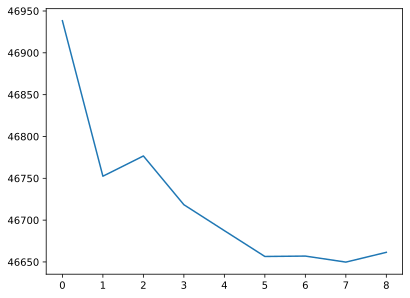

In [18]:
plt.plot(loss_values)
np.savetxt('loss_ABS_TM_128_V2.out', loss_values, delimiter=',')

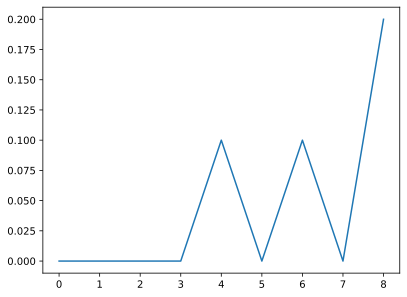

In [19]:
plt.plot(acc)
np.savetxt('acc_TM_128_V2.out', acc, delimiter=',')

In [16]:
vectors = []
with open('acc_TM_128_V2.out', 'r') as arch:
    for line in arch:
        vectors.append(eval(line.rstrip()))
        
acc=np.array(vectors).T
size= len(acc)
print(size)
chunkSize=601

division=size//chunkSize
acc_split=np.split(acc,division-1)

acc_mean=np.mean(acc_split, axis=1)

plt.plot(acc_mean)



5


ValueError: number sections must be larger than 0.

## References
https://colab.research.google.com/github/PytorchLightning/lightning-tutorials/blob/publication/.notebooks/course_UvA-DL/11-vision-transformer.ipynb#scrollTo=d8000482
https://github.com/nerminnuraydogan/vision-transformer/blob/main/vision-transformer.ipynb